In [26]:
import os
import rasterio
import xarray as xr
import rioxarray as rxr
import hvplot.xarray
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import rasterstats as rs
from rasterstats import point_query
import numpy as np
from datetime import datetime
from metloom.pointdata import SnotelPointData
import pytz
import pandas as pd
import geopandas as gpd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import pearsonr
# Set the font size and style
plt.rcParams.update({'font.size': 16, 'font.family': 'Helvetica'})

In [6]:
sdv = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/sdv_average.tif', masked = True)
sdv_values = sdv.values.flatten()

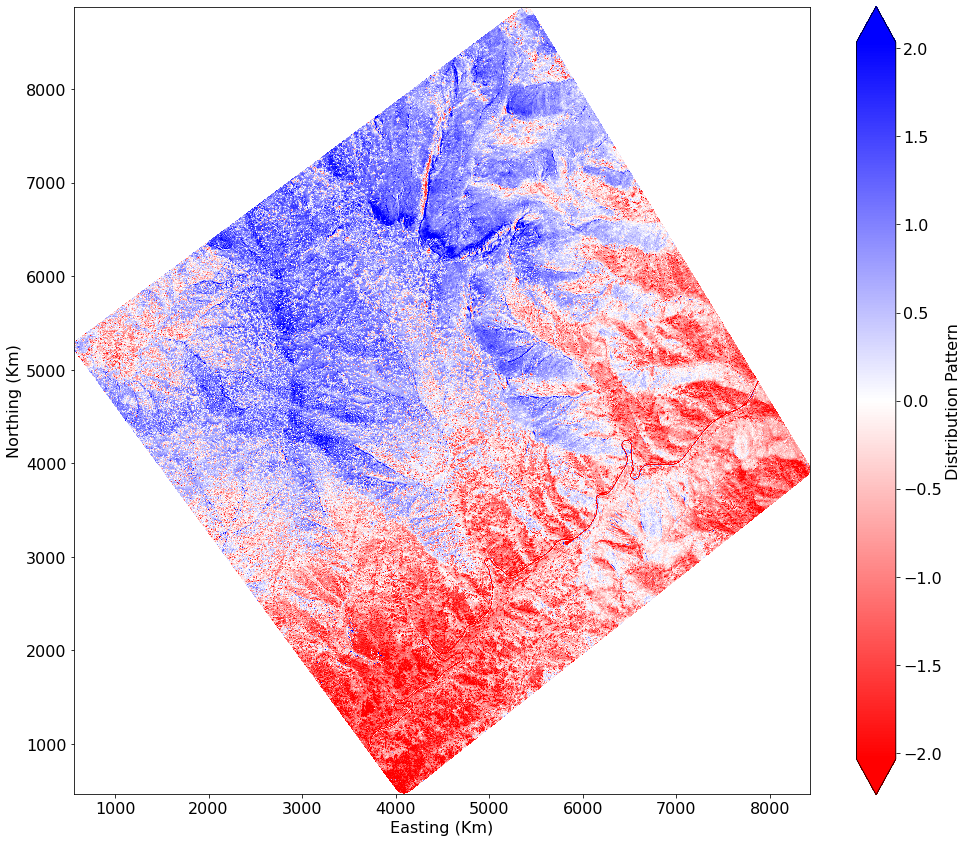

In [10]:
fig, ax = plt.subplots( figsize=(14, 12))
im = sdv.plot(ax=ax, cmap= 'bwr_r', robust = True, cbar_kwargs={'label': 'Distribution Pattern'})
ax.set_title('')
ax.set_aspect('equal')
ax.set_xlabel('Easting (Km)')
ax.set_ylabel('Northing (Km)')
# Format x and y-axis labels to subtract leading digits
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 4.862e6)}"))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 601000)}"))
plt.tight_layout()
plt.show()

In [8]:
Dates = ["02/09/2020", "03/10/2021","03/15/2021", "02/17/2022", "03/17/2022", "04/07/2022", "12/08/2022", "02/09/2023", "03/16/2023", "04/05/2023"]

# #snow depth
# sd_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/lidar-snowdepth/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
#             '/SNOWDATA/IDALS/2021/20210310_MCS/ice-road/20210310_MCS-snowdepth.tif',
#             '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/lidar-snowdepth/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
#             '/SNOWDATA/IDALS/2022/20220217_MCS/ice-road/20220217_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2022/20220317_MCS/ice-road/20220317_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2022/20220407_MCS/ice-road/20220407_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2023/20221208_MCS/ice-road/20221208_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2023/20230209_MCS/ice-road/20230209_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2023/20230316_MCS/ice-road/20230316_MCS-snowdepth.tif',
#             '/SNOWDATA/IDALS/2023/hanover_reprocess_20230405/ice-road/hanover_reprocess-snowdepth.tif']

sdf_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20210310_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220217_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220317_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220407_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230209_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230316_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/hanover_reprocess-snowdepth.tif']

sdfm_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20200209_20200209_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20210310_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20210315_20210315_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220217_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220317_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220407_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230209_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230316_MCS-snowdepth_masked.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/hanover_reprocess-snowdepth_masked.tif']

sdv_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20210310_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220217_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220317_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220407_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20221208_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230209_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230316_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/hanover_reprocess-snowdepth.tif']

sdm_files =  ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20210310_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20220217_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20220317_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20220407_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20221208_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20230209_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/20230316_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/mean_normalized/hanover_reprocess-snowdepth.tif']

sds_files =  ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20210310_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20220217_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20220317_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20220407_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20221208_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20230209_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/20230316_MCS-snowdepth.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/snotel_normalized/hanover_reprocess-snowdepth.tif']

## Snow Depth Spatial Extrapolation (Pflug and Lundquist)

I want to use the snow depth pattern and snow depth rasters to fill in missing snow depth values using 
- Read SDV and SD
- Flatten and extract values
- Regressed SDV and SD (70%)
- Find the slope (sd) and SD at which SDV is zero (mean)
- backtrack to obtain SD

In [12]:
for i in range(len(sdf_files)):
#let's read and flatten raster values
    sd_values =  rxr.open_rasterio(sdf_files[i], masked = True).values.flatten() #the snow depth raster
    sdm_values =  rxr.open_rasterio(sdfm_files[i], masked = True).values.flatten()# the snowdepth masked to the smallest valid rasters (03/10/2021)
    data = pd.DataFrame({'sdv': sdv_values, 'sd' : sd_values, 'sdm' : sdm_values})
    # Preparing the data for regression
    data_f = data.dropna()
    X = data_f['sdv'].values.reshape(-1, 1)  # Predictor variable
    y = data_f['sdm'].values  # Response variable

    # Performing linear regression
    regression_model = LinearRegression()
    regression_model.fit(X, y)

    # Extracting the slope (coefficient) and intercept
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    #predicting
    data['sd_predict'] = (data['sdv'] * slope) + intercept

    # train data assessment
    data_train = data[['sdm', 'sd_predict']].dropna()
    r_T = data['sdm'].corr(data['sd_predict'])
    rmse_T = np.sqrt(mean_squared_error(data_train['sdm'], data_train['sd_predict']))
    r_T, rmse_T

    # all data assessment
    data_all = data[['sd', 'sd_predict']].dropna()
    r = data_all['sd'].corr(data_all['sd_predict'])
    rmse = np.sqrt(mean_squared_error(data_all['sd'], data_all['sd_predict']))
    r, rmse

    print(f'{Dates[i]}: The r and rmse on train and all data are {r_T, rmse_T, r, rmse}')

    # Convert sd column back to original raster shape
    sd_predict_raster = sdv.copy(data=data['sd_predict'].valuf_files[i])[0]}_predict.tif"

    # Write out raster
    sd_predict_raster.rio.to_raster(out_path)

02/09/2020: The r and rmse on train and all data are (0.9060378684309626, 0.18406253, 0.8648406300864893, 0.22259904)
03/10/2021: The r and rmse on train and all data are (0.9327351578434075, 0.17219427, 0.9327351578434075, 0.17219427)
03/15/2021: The r and rmse on train and all data are (0.9489861497312027, 0.16835073, 0.923367431037435, 0.20871666)
02/17/2022: The r and rmse on train and all data are (0.9714030182791086, 0.11137966, 0.9611955420095922, 0.12646265)
03/17/2022: The r and rmse on train and all data are (0.9752231766816561, 0.118769735, 0.9516079833955758, 0.16169183)
04/07/2022: The r and rmse on train and all data are (0.9320736666832637, 0.23115277, 0.9264540867190352, 0.2290175)
12/08/2022: The r and rmse on train and all data are (0.9286382804353945, 0.11274491, 0.9206672130784381, 0.11892741)
02/09/2023: The r and rmse on train and all data are (0.9051292773723411, 0.34764606, 0.8706358046073195, 0.46766347)
03/16/2023: The r and rmse on train and all data are (0.9

Les plo he daa

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


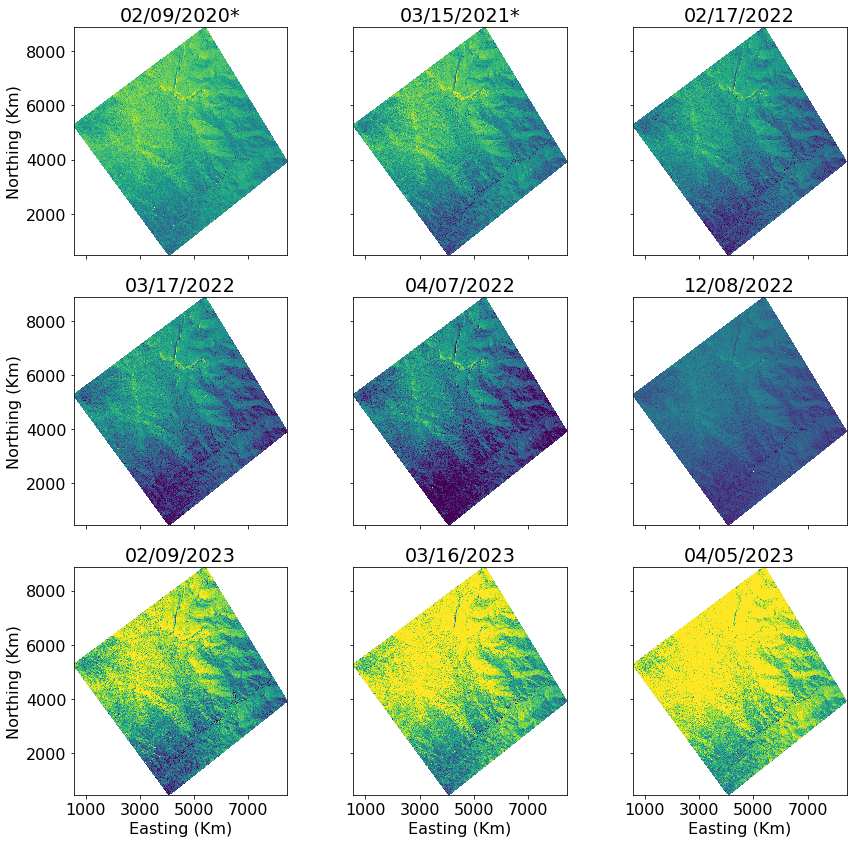

In [2]:
sdfp_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20200209_20200209_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/QSI_0.5M_PCSD_USIDMC_20210315_20210315_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220217_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220317_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20220407_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230209_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20230316_MCS-snowdepth_predict.tif',
                     '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/hanover_reprocess-snowdepth_predict.tif']

Dates = ["02/09/2020*", "03/15/2021*", "02/17/2022", "03/17/2022", "04/07/2022", "12/08/2022", "02/09/2023", "03/16/2023", "04/05/2023"]

# Set minimum and maximum values for colormap  
vmin = 0
vmax = 3

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    if i < len(sdfp_files):
        snow_depth = rxr.open_rasterio(sdfp_files[i], masked=True)
        im = snow_depth.plot(ax=ax, cmap='viridis', vmin=vmin, vmax=vmax, add_colorbar=False, robust=True)
        ax.set_title(Dates[i])
        ax.set_aspect('equal')
        ax.set_xlabel('Easting (Km)')
        ax.set_ylabel('Northing (Km)')
        ax.label_outer()  # Hides the labels of the shared axes
        # Format x and y-axis labels to subtract leading digits
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 4.862e6)}"))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 601000)}"))
        


plt.tight_layout()
plt.show()

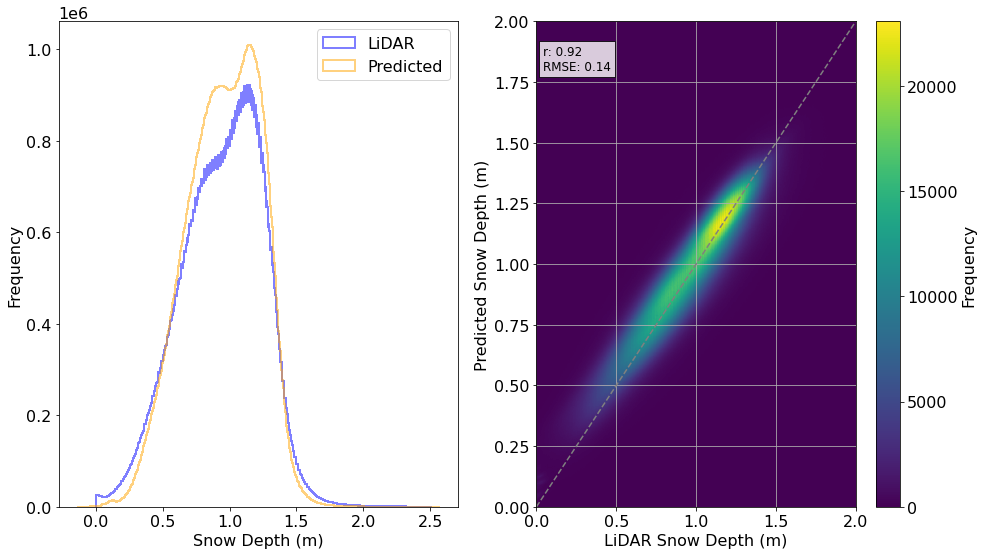

In [11]:
pred = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth_predict.tif')
Lid = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth.tif')
LiD_values = Lid.values.flatten()
pred_values = pred.values.flatten()
valid_indices = ~np.isnan(LiD_values) & ~np.isnan(pred_values)
LiD_values = LiD_values[valid_indices]
pred_values = pred_values[valid_indices]
# Create a single figure with two subplots (histogram and heatmap)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot histogram of LiD_sliced and sfm_sliced distributions
axes[0].hist(LiD_values, bins=500, color='blue', alpha=0.5, histtype='step', linewidth=2, label='LiDAR')
axes[0].hist(pred_values, bins=500, color='orange', alpha=0.5, histtype='step', linewidth=2, label='Predicted')
axes[0].set_xlabel('Snow Depth (m)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Create a heatmap to compare LiD_sliced and sfm_sliced values
heatmap, xedges, yedges = np.histogram2d(LiD_values, pred_values, bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = axes[1].imshow(heatmap.T, origin='lower', extent=extent, cmap='viridis', aspect='auto')

# Add a hypothetical one-to-one dashed line
max = LiD_values.max()
axes[1].plot([0, 2], [0, 2], linestyle='--', color='gray')
# Add the correlation coefficient and RMSE as text to the upper left corner
combined_text = '\n'.join(['r: 0.92', 'RMSE: 0.14'])
axes[1].text(0.02, 0.90, combined_text, transform=axes[1].transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar to the heatmap
cbar = plt.colorbar(im, ax=axes[1], label='Frequency')
axes[1].set_xlabel('LiDAR Snow Depth (m)')
axes[1].set_ylabel('Predicted Snow Depth (m)')
axes[1].set_xlim(0, 2)
axes[1].set_ylim(0, 2)
axes[1].grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

## Predict with 10 point samples
- Take 10 random points
- extract pixel values of these points for each raster
- Use the extracted values with the snow distribution pattern to predict domain wide snow depth.

In [25]:

#read the snow distribution pattern
sdv_raster = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/sdv_average.tif', masked = True)
#read the points from geopackage
gdf = gpd.read_file('/home/naheemadebisi/nfs_home/snow-analytics/lidar_mcs/results/Training_Points_10.gpkg')
for i in range(len(sdf_files)):
    #sample the sdv and snow depth at 10 points
    snowDepth = rxr.open_rasterio(sdf_files[i])
    sdv = point_query(gdf.geometry, sdv_raster.squeeze().values, affine = snowDepth.rio.transform(), nodata = -9999)
    sd = point_query(gdf.geometry, snowDepth.squeeze().values, affine = snowDepth.rio.transform(), nodata = -9999)
    df = pd.DataFrame({'sdv': sdv, 'sd' : sd})
    # Preparing the data for regression
    df = df.dropna()
    num_records = len(df)
    X = df['sdv'].values.reshape(-1, 1)  # Predictor variable
    y = df['sd'].values  # Response variable

    # Performing linear regression
    regression_model = LinearRegression()
    regression_model.fit(X, y)

    # Extracting the slope (coefficient) and intercept
    slope = regression_model.coef_[0]
    intercept = regression_model.intercept_

    # sample sdv raster for easy prediction
    data = pd.DataFrame({'sdv': sdv_values})
    #predicting
    data['sd_predict'] = (data['sdv'] * slope) + intercept
    #get the truth data
    sd_values =  rxr.open_rasterio(sdf_files[i], masked = True).values.flatten() #the snow depth raster
    data['sd'] = sd_values
    # all data assessment
    data_all = data[['sd', 'sd_predict']].dropna()
    r = data_all['sd'].corr(data_all['sd_predict'])
    rmse = np.sqrt(mean_squared_error(data_all['sd'], data_all['sd_predict']))
    r, rmse

    print(f'{Dates[i]}: The r and rmse are { r, rmse}. The data is trained with { len(df)} records')

    # Convert sd column back to original raster shape
    sd_predict_raster = sdv_raster.copy(data=data['sd_predict'].values.reshape(sdv_raster.shape))
    path = sdf_files[i]
    filename_without_extension = os.path.splitext(os.path.basename(path))[0] # Get the filename without the extension
    new_filename = filename_without_extension + '_10pts_predict.tif'  # Append "_10pts_predict.tif" to the filename
    new_path = os.path.join(os.path.dirname(path), new_filename) # The new path with the modified filename
    sd_predict_raster.rio.to_raster(new_path) # Write out raster

02/09/2020: The r and rmse are (0.8864236321224411, 0.20423897155595358). The data is trained with 10 records
03/10/2021: The r and rmse are (0.9379345607196841, 0.18550149769344448). The data is trained with 4 records
03/15/2021: The r and rmse are (0.9316626993002884, 0.19435708436171364). The data is trained with 10 records
02/17/2022: The r and rmse are (0.9632240467287679, 0.1582874794812072). The data is trained with 7 records
03/17/2022: The r and rmse are (0.9585405810479117, 0.15493635006287296). The data is trained with 10 records
04/07/2022: The r and rmse are (0.9185979204147172, 0.28320163203843735). The data is trained with 8 records
12/08/2022: The r and rmse are (0.9262913016530177, 0.14692908896167373). The data is trained with 10 records
02/09/2023: The r and rmse are (0.8345701793238616, 0.5029157651810426). The data is trained with 10 records
03/16/2023: The r and rmse are (0.968021884004958, 0.19419943361290887). The data is trained with 9 records
04/05/2023: The r

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


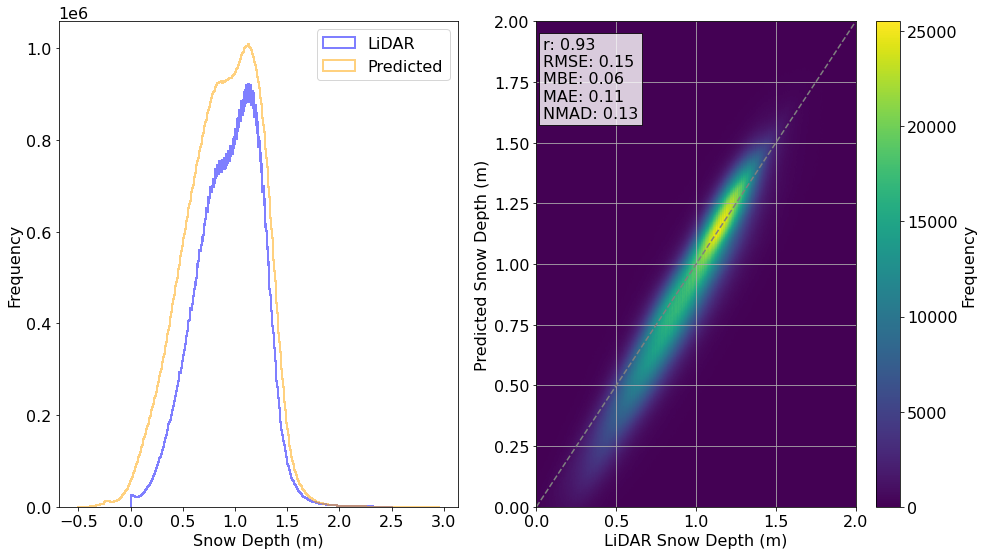

In [27]:
pred = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth_10pts_predict.tif')
Lid = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20221208_MCS-snowdepth.tif')
LiD_values = Lid.values.flatten()
pred_values = pred.values.flatten()
valid_indices = ~np.isnan(LiD_values) & ~np.isnan(pred_values)
LiD_values = LiD_values[valid_indices]
pred_values = pred_values[valid_indices]
# Create a single figure with two subplots (histogram and heatmap)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot histogram of LiDAR and predicted snow depth distributions
axes[0].hist(LiD_values, bins=500, color='blue', alpha=0.5, histtype='step', linewidth=2, label='LiDAR')
axes[0].hist(pred_values, bins=500, color='orange', alpha=0.5, histtype='step', linewidth=2, label='Predicted')
axes[0].set_xlabel('Snow Depth (m)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Create a heatmap to compare LiDAR and predicted snow depth
heatmap, xedges, yedges = np.histogram2d(LiD_values, pred_values, bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = axes[1].imshow(heatmap.T, origin='lower', extent=extent, cmap='viridis', aspect='auto')

# Add a hypothetical one-to-one dashed line
axes[1].plot([0, 2], [0, 2], linestyle='--', color='gray')

# Calculate the correlation coefficient
correlation, _ = pearsonr(LiD_values, pred_values)
correlation_text = f'r: {correlation:.2f}'

# Calculate the Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(LiD_values, pred_values))
rmse_text = f'RMSE: {rmse:.2f}'

# Calculate MBE, MAE, and NMAD
mbe = np.mean(LiD_values - pred_values)
mbe_text = f'MBE: {mbe:.2f}'
mae = np.mean(np.abs(LiD_values - pred_values))
mae_text = f'MAE: {mae:.2f}'
nmad = 1.4826 * np.median(np.abs(LiD_values - pred_values))
nmad_text = f'NMAD: {nmad:.2f}'

# Add the correlation coefficient and RMSE as text to the upper left corner
combined_text = '\n'.join([correlation_text, rmse_text, mbe_text, mae_text, nmad_text])
axes[1].text(0.02, 0.80, combined_text, transform=axes[1].transAxes, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Add colorbar to the heatmap
cbar = plt.colorbar(im, ax=axes[1], label='Frequency')
axes[1].set_xlabel('LiDAR Snow Depth (m)')
axes[1].set_ylabel('Predicted Snow Depth (m)')
axes[1].set_xlim(0, 2)
axes[1].set_ylim(0, 2)
axes[1].grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [4]:
# gdf_20220217= gpd.read_file('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/new_bundary_20220217.gpkg')
# sd_pre = rxr.open_rasterio('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/filtered/20210310_MCS-snowdepth_predict.tif')
# fig, ax = plt.subplots( figsize=(14, 12))
# im = sd_pre.plot(ax=ax, cmap= 'viridis', robust = True, cbar_kwargs={'label': 'Snow Depth (m)'})
# gdf_20220217.plot(ax=ax, color='none', edgecolor='red')
# ax.scatter(607084.3493239387, 4865185.334007569, marker='*', s=100, color="red", label='SNOTEL')
# ax.set_title('03/10/2021 with missing values inferred')
# ax.set_aspect('equal')
# ax.set_xlabel('Easting (Km)')
# ax.set_ylabel('Northing (Km)')
# # Format x and y-axis labels to subtract leading digits
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 4.862e6)}"))
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 601000)}"))
# plt.tight_layout()
# plt.show()

In [2]:
# # Set the file paths for the snow depth
# sdv_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220217_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220317_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220407_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20221208_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230209_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230316_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/hanover_reprocess-snowdepth.tif']

# Dates = ["02/09/2020*","03/15/2021*", "02/17/2022", "03/17/2022", "04/07/2022", "12/08/2022", "02/09/2023", "03/16/2023", "04/05/2023"]

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 12), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flat):
#     if i < len(sdv_files):
#         snow_depth = rxr.open_rasterio(sdv_files[i], masked=True)
#         im = snow_depth.plot(ax=ax, cmap='bwr_r', vmin=-2, vmax=2, add_colorbar=False, robust = True)
#         ax.set_title(Dates[i])
#         ax.set_aspect('equal')
#         ax.set_xlabel('Easting (Km)')
#         ax.set_ylabel('Northing (Km)')
#         ax.label_outer()  # Hides the labels of the shared axes
#         # Format x and y-axis labels to subtract leading digits
#         ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 4.862e6)}"))
#         ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 601000)}"))
        


# plt.tight_layout()
# plt.show()
# # fig.savefig('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/figures/sd_mean-normalized.jpg', dpi=300, bbox_inches='tight')


In [1]:
# # Set the file paths for the snow depth
# sdv_files = ['/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20200209_20200209.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/QSI_0.5M_PCSD_USIDMC_20210315_20210315.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220217_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220317_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20220407_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20221208_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230209_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/20230316_MCS-snowdepth.tif',
#                      '/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/snowdepth/sdv/hanover_reprocess-snowdepth.tif']

# Dates = ["02/09/2020*","03/15/2021*", "02/17/2022", "03/17/2022", "04/07/2022", "12/08/2022", "02/09/2023", "03/16/2023", "04/05/2023"]

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 12), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flat):
#     if i < len(sdv_files):
#         snow_depth = rxr.open_rasterio(sdv_files[i], masked=True)
#         im = snow_depth.plot(ax=ax, cmap='bwr_r', vmin=-2, vmax=2, add_colorbar=False, robust = True)
#         ax.set_title(Dates[i])
#         ax.set_aspect('equal')
#         ax.set_xlabel('Easting (Km)')
#         ax.set_ylabel('Northing (Km)')
#         ax.label_outer()  # Hides the labels of the shared axes
#         # Format x and y-axis labels to subtract leading digits
#         ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 4.862e6)}"))
#         ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(x - 601000)}"))
        


# plt.tight_layout()
# plt.show()
# # fig.savefig('/nfs_home/naheemadebisi/snow-analytics/lidar_mcs/results/figures/sd_mean-normalized.jpg', dpi=300, bbox_inches='tight')
